In [95]:
# Importing Libraries:

import pandas as pd
import numpy as np

from scipy.stats import shapiro
from statsmodels.api import qqplot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# Importing data:

df_raw = pd.read_csv("Solar_Power_Plant_Data.csv")

In [4]:
# Copy of the dataset:
df = df_raw.copy()

In [5]:
# Looking at the first 5 rolls:

df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0


In [6]:
# Information about the dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


In [7]:
# Missing data:

df.isna().sum()

Date-Hour(NMT)         0
WindSpeed              0
Sunshine               0
AirPressure            0
Radiation              0
AirTemperature         0
RelativeAirHumidity    0
SystemProduction       0
dtype: int64

In [8]:
# Changing Date-Hour(NMT) column type:

df['Date-Hour(NMT)'] = pd.to_datetime(df['Date-Hour(NMT)'], format="%d.%m.%Y-%H:%M")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date-Hour(NMT)       8760 non-null   datetime64[ns]
 1   WindSpeed            8760 non-null   float64       
 2   Sunshine             8760 non-null   int64         
 3   AirPressure          8760 non-null   float64       
 4   Radiation            8760 non-null   float64       
 5   AirTemperature       8760 non-null   float64       
 6   RelativeAirHumidity  8760 non-null   int64         
 7   SystemProduction     8760 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 547.6 KB


In [102]:
# Range of datetime column:

print(f"Range of Datetime column: ({df.index.min()}) to ({df.index.max()})")

Range of Datetime column: (2017-01-01 00:00:00) to (2017-12-31 23:00:00)


In [9]:
# Setting the Date-Hour(NUMT) as the index:

df.set_index("Date-Hour(NMT)", inplace=True)

In [10]:
# Descriptive Statistics analysis:

df.describe()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2.639823,11.180479,1010.361781,97.538493,6.978893,76.719406,684.746071
std,1.628754,21.171295,12.793971,182.336029,7.604266,19.278996,1487.454665
min,0.000000,0.000000,965.900000,-9.300000,-12.400000,13.000000,0.000000
25%,1.400000,0.000000,1002.800000,-6.200000,0.500000,64.000000,0.000000
50%,2.300000,0.000000,1011.000000,-1.400000,6.400000,82.000000,0.000000
75%,3.600000,7.000000,1018.200000,115.600000,13.400000,93.000000,464.249950
max,10.900000,60.000000,1047.300000,899.700000,27.100000,100.000000,7701.000000


Conclusions

- One year of one-hour mesurements.
- As we can see from the statistic summary, there are some negative data points in Radiation column.
- Most data in SystemProduction and Sunshine columns may be zero. 

In [11]:
# Let's change the type of the numeric variables:

df['Sunshine'] = df['Sunshine'].astype("int16")
df['RelativeAirHumidity'] = df['RelativeAirHumidity'].astype("int16")
df['WindSpeed'] = df['WindSpeed'].astype("float32")
df['Radiation'] = df['Radiation'].astype("float32")
df['AirTemperature'] = df['AirTemperature'].astype("float32")

The memory usage of the dataset reduced from 547.6 to 342.2 KB.

In [12]:
# Information about the dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WindSpeed            8760 non-null   float32
 1   Sunshine             8760 non-null   int16  
 2   AirPressure          8760 non-null   float64
 3   Radiation            8760 non-null   float32
 4   AirTemperature       8760 non-null   float32
 5   RelativeAirHumidity  8760 non-null   int16  
 6   SystemProduction     8760 non-null   float64
dtypes: float32(3), float64(2), int16(2)
memory usage: 342.2 KB


We will look at the histogram of all variables

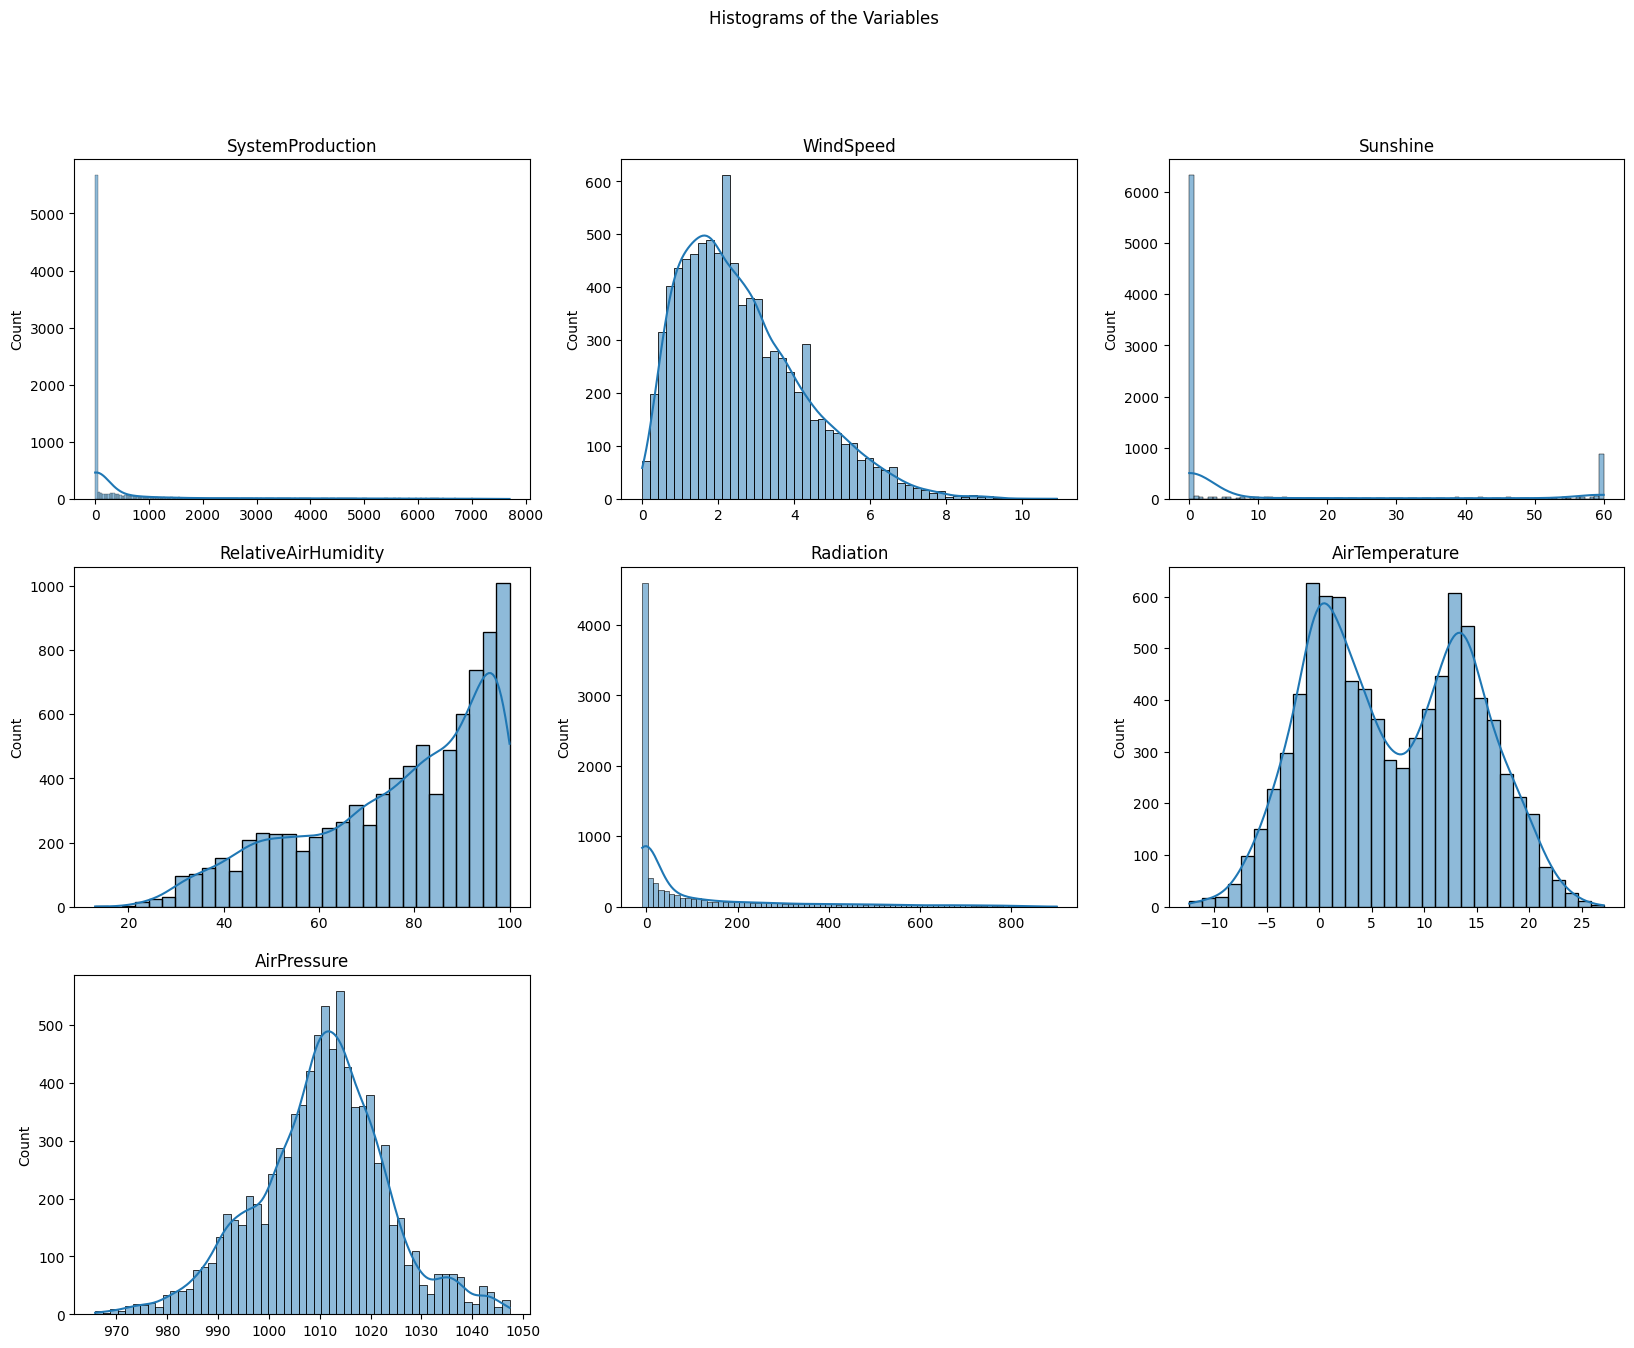

In [94]:
# Histograms:

fig, axes = plt.subplots(nrows=3, ncols=3, sharey=False, figsize=(20, 15))
fig.suptitle("Histograms of the Variables")

sns.histplot(df["SystemProduction"].values, ax=axes[0, 0], kde=True)
axes[0, 0].set_title("SystemProduction")

sns.histplot(df["WindSpeed"].values, ax=axes[0, 1], kde=True)
axes[0, 1].set_title("WindSpeed")

sns.histplot(df["Sunshine"].values, ax=axes[0][2], kde=True)
axes[0][2].set_title("Sunshine")

sns.histplot(df["RelativeAirHumidity"].values, ax=axes[1, 0], kde=True)
axes[1, 0].set_title("RelativeAirHumidity")

sns.histplot(df["Radiation"].values, ax=axes[1, 1], kde=True, legend=False)
axes[1, 1].set_title("Radiation")

sns.histplot(df["AirTemperature"].values, ax=axes[1, 2], kde=True)
axes[1, 2].set_title("AirTemperature")

sns.histplot(df["AirPressure"].values, ax=axes[2, 0], kde=True)
axes[2, 0].set_title("AirPressure");

axes[2, 1].set_visible(False)
axes[2, 2].set_visible(False)

Looking at the Histograms, we may think that AirPressure column was drew from a normal distribution. Let's look at the boxplots.

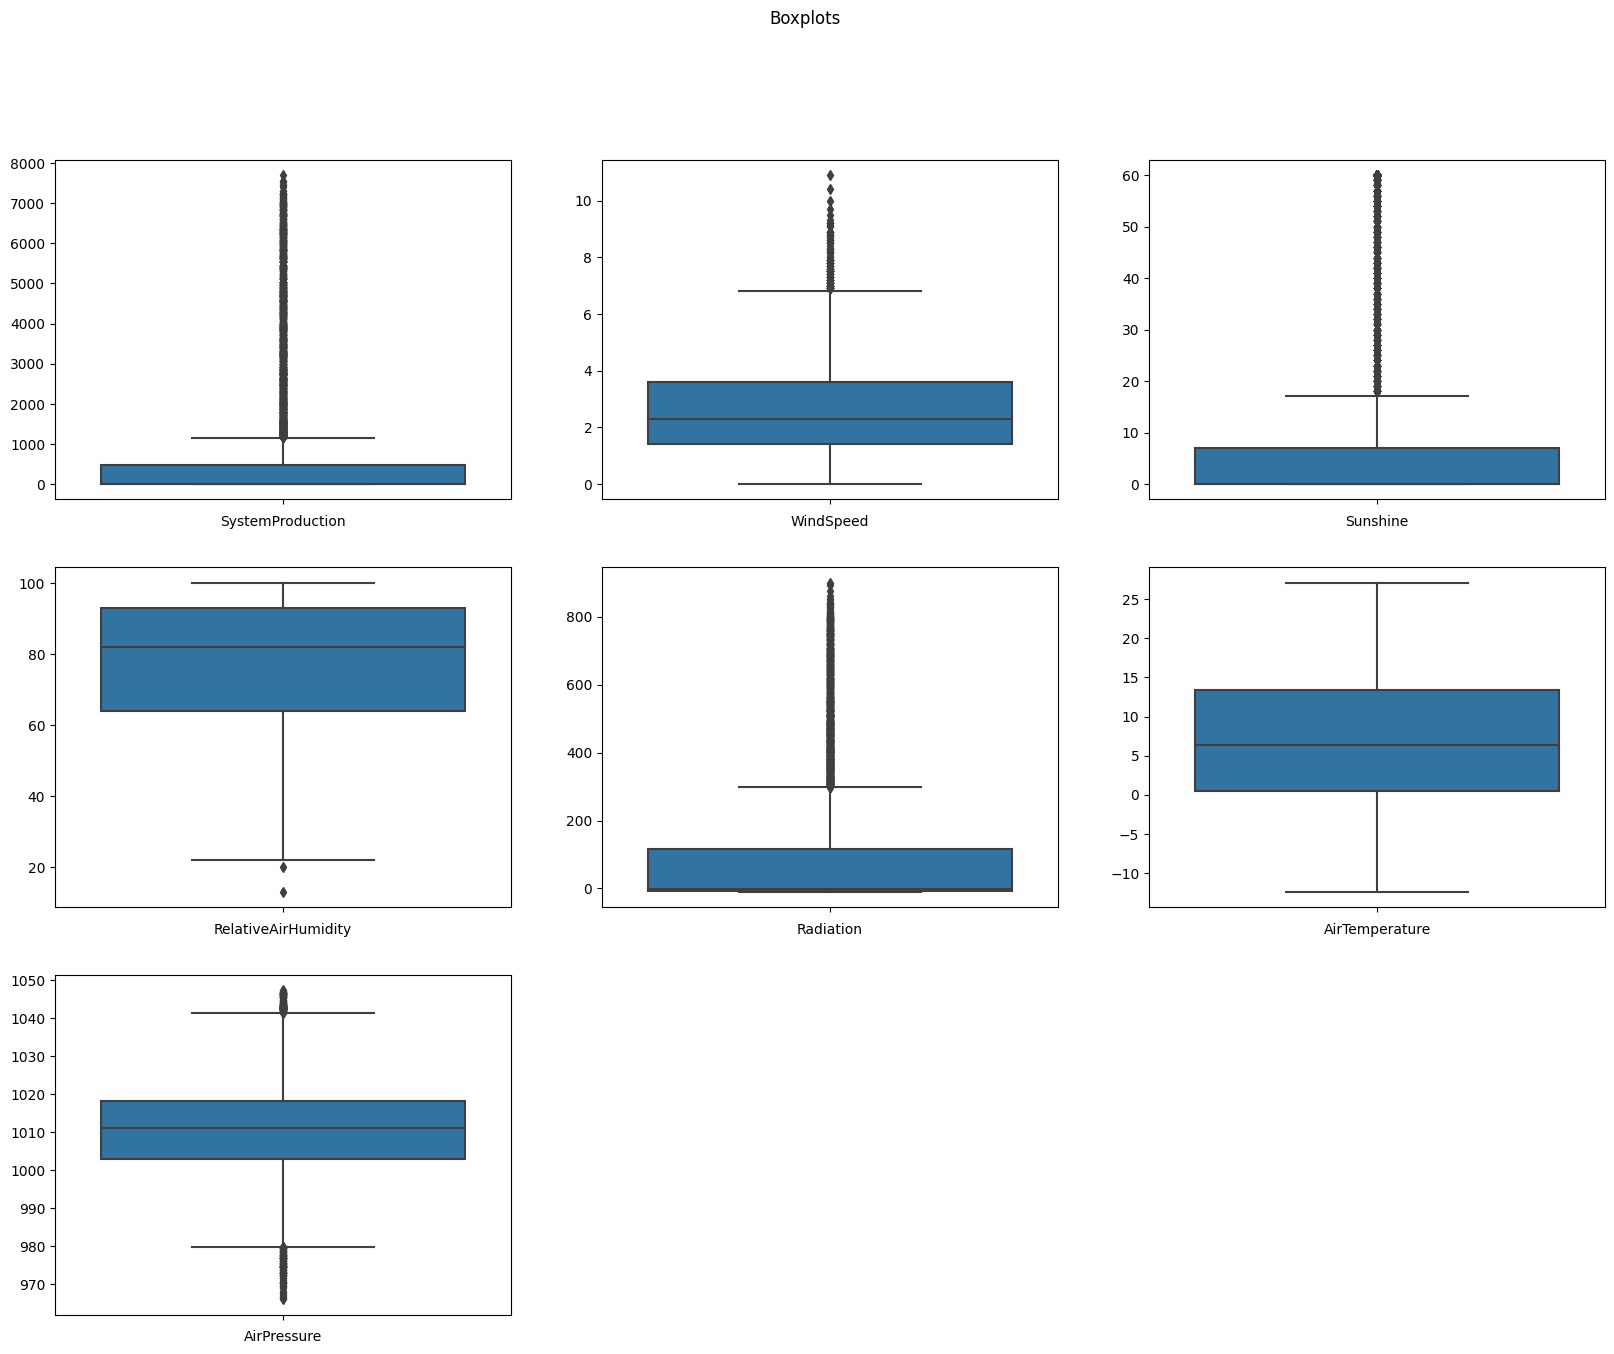

In [93]:
# BoxPlots:

fig, ax = plt.subplots(3, 3, figsize=(20, 15), sharey=False)
fig.suptitle("Boxplots")

sns.boxplot(y=df["SystemProduction"].values, ax=ax[0, 0])
ax[0, 0].set_xlabel("SystemProduction")

sns.boxplot(y=df["WindSpeed"].values, ax=ax[0, 1])
ax[0, 1].set_xlabel("WindSpeed")

sns.boxplot(y=df["Sunshine"].values, ax=ax[0, 2])
ax[0, 2].set_xlabel("Sunshine")

sns.boxplot(y=df["RelativeAirHumidity"].values, ax=ax[1, 0])
ax[1, 0].set_xlabel("RelativeAirHumidity")

sns.boxplot(y=df["Radiation"].values, ax=ax[1, 1])
ax[1, 1].set_xlabel("Radiation")

sns.boxplot(y=df["AirTemperature"].values, ax=ax[1, 2])
ax[1, 2].set_xlabel("AirTemperature")

sns.boxplot(y=df["AirPressure"].values, ax=ax[2, 0])
ax[2, 0].set_xlabel("AirPressure");

ax[2, 1].set_visible(False)
ax[2, 2].set_visible(False)

Conclusions

- Most of the data in SystemProduction is 0 as we expected since median is zero and the variable can't be negative.
- Outliers exist in SystemProduction, AirPressure, RelativeHumidity, Radiation, WindSpeed and Sunshine.

In [66]:
# Shapiro-Wilk Normality test:

for c in df.columns:
    shapiro_statistic = shapiro(df[c])
    print(f"{c} - {shapiro_statistic}")

WindSpeed - ShapiroResult(statistic=0.9421548843383789, pvalue=0.0)
Sunshine - ShapiroResult(statistic=0.5596352219581604, pvalue=0.0)
AirPressure - ShapiroResult(statistic=0.9922052621841431, pvalue=1.6409457934429944e-21)
Radiation - ShapiroResult(statistic=0.6406422853469849, pvalue=0.0)
AirTemperature - ShapiroResult(statistic=0.9712174534797668, pvalue=1.3761387109172507e-38)
RelativeAirHumidity - ShapiroResult(statistic=0.9158114194869995, pvalue=0.0)
SystemProduction - ShapiroResult(statistic=0.5321153998374939, pvalue=0.0)
